In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# Generate stock market data
start = '2012-01-01'
end = '2022-12-12'
stock = 'GOOG'

df = yf.download(stock, start, end)
df.head()

/tmp/ipython-input-2-492164097.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.475201,16.543042,16.152336,16.166451,147611217
2012-01-04,16.546255,16.595032,16.356598,16.465787,114989399
2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
2012-01-09,15.411780,16.019379,15.381326,16.006997,233776981


In [ ]:
# Generate index of the dataset
df.reset_index(inplace=True)
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475201,16.543042,16.152336,16.166451,147611217
1,2012-01-04,16.546255,16.595032,16.356598,16.465787,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411780,16.019379,15.381326,16.006997,233776981


In [ ]:
# Generate moving average of 100 days ( based on 100 days we predict the value of 101 day )
ma_100_days = df.Close.rolling(100).mean()

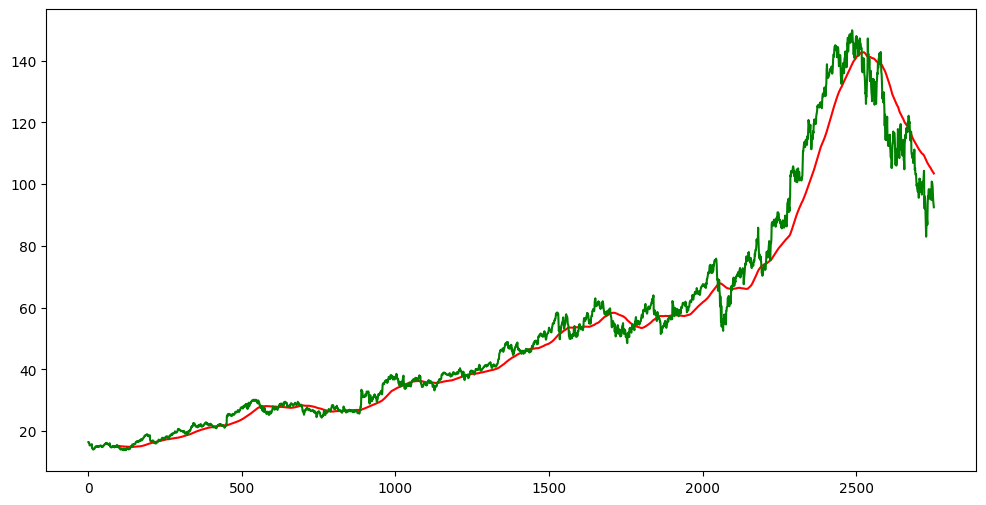

In [ ]:
# Now plot graph
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(df['Close'], 'g')
plt.show()

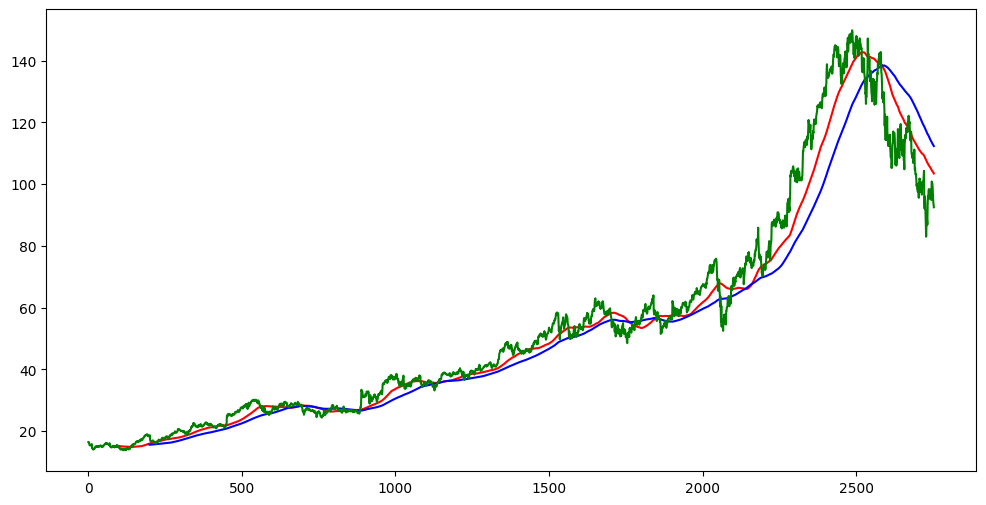

In [ ]:
# Generate moving average for the 200 days
ma_200_days = df.Close.rolling(200).mean()

# Plot graph
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(df['Close'], 'g')
plt.show()
#

In [ ]:
# Find missing values
df.isnull().sum()

,,0
Price,Ticker,
Date,,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [ ]:
# Split the data into Train and test data
train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
test_data = pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))])

In [ ]:
# Shape of the train data
train_data.shape

(2203, 1)

In [ ]:
# Shape of the test data
test_data.shape

(551, 1)

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
# Scale the train data
scaled_train_data = scaler.fit_transform(train_data)

In [ ]:
# We did array slicing to calculate the data of one at one data
x = []
y = []

for i in range(100, scaled_train_data.shape[0]):
  x.append(scaled_train_data[i-100:i])
  y.append(scaled_train_data[i, 0])

x, y = np.array(x),np.array(y)

### Buliding Model

In [ ]:
!pip install keras

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
# Create model
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - loss: 0.0758
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 350ms/step - loss: 0.0073
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 359ms/step - loss: 0.0055
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 360ms/step - loss: 0.0050
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 342ms/step - loss: 0.0051
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 343ms/step - loss: 0.0051
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 359ms/step - loss: 0.0044
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 357ms/step - loss: 0.0055
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 360ms/step - loss: 0.0042
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 361ms/step - loss: 0.0039
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 349ms/step - loss: 0.0032
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 340ms/step - loss: 0.0038
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 336ms/step - loss: 0.0036
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 364ms/step - loss: 0.0032
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

## Prediction

In [19]:
# Get last 100 days to test our model
pas_100_days = train_data.tail(100)

In [20]:
# Test dataset
test_data = pd.concat([pas_100_days, test_data], ignore_index=True)

In [21]:
test_data

Ticker,GOOG
0,67.067841
1,67.405830
2,68.253799
3,68.788109
4,68.268448
...,...
646,99.279869
647,96.734985
648,94.587753
649,93.394844


In [22]:
# Scale the test data
scaled_test_data = scaler.fit_transform(test_data)

In [23]:
x = []
y = []

for i in range(100, scaled_test_data.shape[0]):
  x.append(scaled_test_data[i-100:i])
  y.append(scaled_test_data[i, 0])

x, y = np.array(x), np.array(y)

In [24]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step


In [25]:
y_predict

array([[0.11461705],
       [0.11082713],
       [0.10756618],
       [0.10477763],
       [0.10244752],
       [0.10062554],
       [0.09943539],
       [0.09900072],
       [0.09937128],
       [0.10050325],
       [0.10232286],
       [0.10467845],
       [0.1074107 ],
       [0.11044194],
       [0.11376795],
       [0.1174413 ],
       [0.12141269],
       [0.1255876 ],
       [0.12972194],
       [0.13360465],
       [0.13719745],
       [0.14055333],
       [0.1437845 ],
       [0.1471647 ],
       [0.15096366],
       [0.15534356],
       [0.16031581],
       [0.16577548],
       [0.1715982 ],
       [0.17762133],
       [0.18371557],
       [0.18977296],
       [0.19568563],
       [0.20128936],
       [0.20646098],
       [0.21108007],
       [0.21505502],
       [0.21837237],
       [0.22108367],
       [0.22331837],
       [0.22515401],
       [0.22671947],
       [0.22821926],
       [0.22985375],
       [0.23174493],
       [0.23391964],
       [0.23637821],
       [0.239

In [26]:
scaler.scale_

array([0.0120845])

In [27]:
scale = 1/scaler.scale_

In [28]:
y_predict = y_predict * scale

In [29]:
y = y * scale

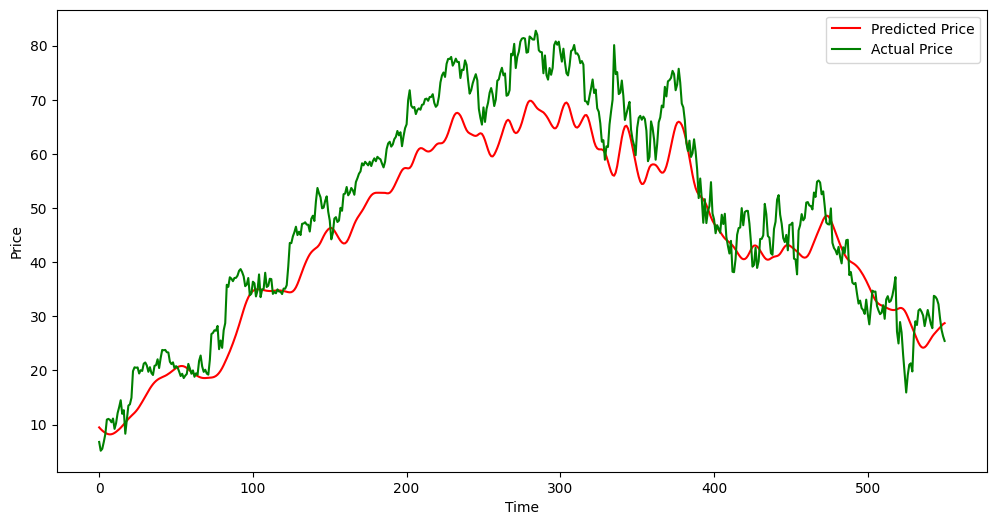

In [30]:
# Draw the graph between y and y_predict
plt.figure(figsize=(12,6))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Model Deployment

In [31]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)